In [1]:
from helper import Search, query, connections

In [17]:
def search():
    return Search("elastipy-example-commits-*")

<AxesSubplot:xlabel='a0'>

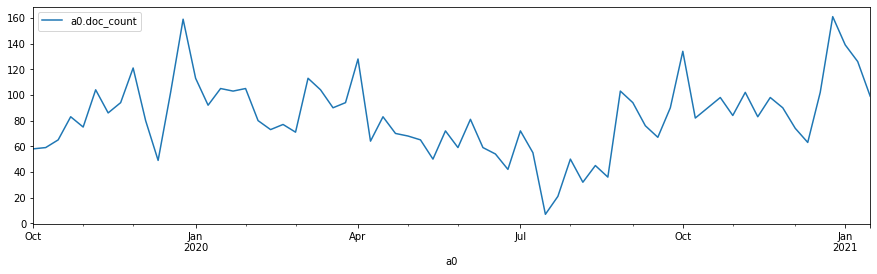

In [18]:
s = search()
agg = s.agg_date_histogram(field="date", calendar_interval="1w")
agg.execute().df().plot(figsize=(15,4))

<AxesSubplot:xlabel='a0'>

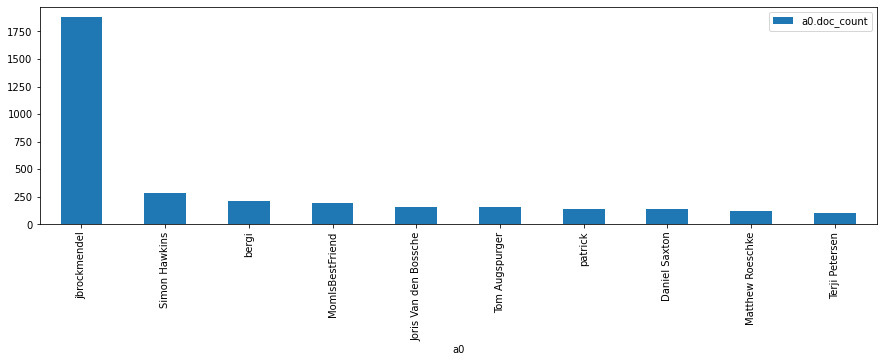

In [12]:
s = search()
agg = s.agg_terms(field="author")
agg.execute().df().plot.bar(figsize=(15,4))

In [30]:
s = search()
agg = s.agg_filters(filters={
    "fix": query.Match(field="message", query="fix"),
    "merge": query.Match(field="message", query="merge"),
    "bug": query.Match(field="message", query="bug"),
})
agg = agg.agg_date_histogram(field="date", calendar_interval="1M")
agg.execute().to_matrix()

(['a0', 'a1'],
 [['bug', 'fix', 'merge'],
  ['2019-10-01T00:00:00.000Z',
   '2019-11-01T00:00:00.000Z',
   '2019-12-01T00:00:00.000Z',
   '2020-01-01T00:00:00.000Z',
   '2020-02-01T00:00:00.000Z',
   '2020-03-01T00:00:00.000Z',
   '2020-04-01T00:00:00.000Z',
   '2020-05-01T00:00:00.000Z',
   '2020-06-01T00:00:00.000Z',
   '2020-07-01T00:00:00.000Z',
   '2020-08-01T00:00:00.000Z',
   '2020-09-01T00:00:00.000Z',
   '2020-10-01T00:00:00.000Z',
   '2020-11-01T00:00:00.000Z',
   '2020-12-01T00:00:00.000Z',
   '2021-01-01T00:00:00.000Z']],
 [[17, 29, 30, 76, 51, 52, 64, 41, 40, 25, 34, 57, 66, 70, 97, 56],
  [44, 34, 28, 49, 36, 61, 59, 35, 28, 17, 21, 38, 49, 46, 40, 43],
  [3, 4, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 5, 6, 14]])

In [23]:
s = search().term("project", "pandas-dev/pandas")
s.execute().dump.documents()

[
  {
    "project": "pandas-dev/pandas",
    "sha": "9ed521e363959ea2aa2fd5c987aa08b5730a9454",
    "date": "2021-01-22T23:28:06Z",
    "author": "jbrockmendel",
    "github_author": "jbrockmendel",
    "message": "REF: Fix PeriodIndex._outer_indexer -> share remaining set methods (#39331)",
    "comment_count": 0
  },
  {
    "project": "pandas-dev/pandas",
    "sha": "fc08415436b0f5c3f8482e89c50fe3c5e8f2d381",
    "date": "2021-01-22T23:26:51Z",
    "author": "Anna Daglis",
    "github_author": "AnnaDaglis",
    "message": "BUG: SeriesGroupBy.value_counts() raising error on an empty Series (#39326)",
    "comment_count": 0
  },
  {
    "project": "pandas-dev/pandas",
    "sha": "7e531e3dfabd22fdf6669ea3b4caaf8e3b57cdd8",
    "date": "2021-01-22T21:42:33Z",
    "author": "realead",
    "github_author": "realead",
    "message": "ENH: making value_counts stable/keeping original ordering (#39009)",
    "comment_count": 0
  },
  {
    "project": "pandas-dev/pandas",
    "sha": "2f883215

In [33]:
import math
class ColorScale:

    def __init__(self, ascii=False, colors=True):
        self.characters = []
        if colors and not ascii:
            colors = [4, 6, 2, 7]

            intensity = 0
            back_color = 0
            shades = ("░", "▒", "▓", "█")
            for i, color in enumerate(colors):
                for ch in shades:
                    ansi = f"\033[{intensity};{30+color};{40+back_color}m{ch}\033[0m"
                    self.characters.append(ansi)
                back_color = color
                if i == 0:
                    shades = shades[1:]
        else:
            raise NotImplementedError

    def __call__(self, v: float):
        i = max(0, min(len(self.characters) - 1, int(v * len(self.characters))))
        return self.characters[i]


def scale():
    scale = ColorScale()
    for y in range(-10, 10):
        for x in range(-10, 10):
            d = math.sqrt(x*x + y*y)
            print(scale(1 - d / 10) * 2, end="")
        print()


scale()

░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░
░░░░░░░░░░░░▒▒▒▒▓▓▓▓▓▓▓▓▓▓▒▒▒▒░░░░░░░░░░
░░░░░░░░▒▒▒▒▓▓██████████████▓▓▒▒▒▒░░░░░░
░░░░░░▒▒▒▒▓▓██▒▒▒▒▓▓▓▓▓▓▒▒▒▒██▓▓▒▒▒▒░░░░
░░░░░░▒▒▓▓██▒▒▓▓▓▓██████▓▓▓▓▒▒██▓▓▒▒░░░░
░░░░▒▒▓▓██▒▒▓▓██▒▒▒▒▒▒▒▒▒▒██▓▓▒▒██▓▓▒▒░░
░░░░▒▒██▒▒▓▓██▒▒▓▓▓▓██▓▓▓▓▒▒██▓▓▒▒██▒▒░░
░░▒▒▓▓██▒▒▓▓▒▒▓▓██▒▒▒▒▒▒██▓▓▒▒▓▓▒▒██▓▓▒▒
░░▒▒▓▓██▓▓██▒▒▓▓▒▒▓▓▓▓▓▓▒▒▓▓▒▒██▓▓██▓▓▒▒
░░▒▒▓▓██▓▓██▒▒██▒▒▓▓██▓▓▒▒██▒▒██▓▓██▓▓▒▒
░░▒▒▓▓██▓▓██▒▒▓▓▒▒▓▓▓▓▓▓▒▒▓▓▒▒██▓▓██▓▓▒▒
░░▒▒▓▓██▒▒▓▓▒▒▓▓██▒▒▒▒▒▒██▓▓▒▒▓▓▒▒██▓▓▒▒
░░░░▒▒██▒▒▓▓██▒▒▓▓▓▓██▓▓▓▓▒▒██▓▓▒▒██▒▒░░
░░░░▒▒▓▓██▒▒▓▓██▒▒▒▒▒▒▒▒▒▒██▓▓▒▒██▓▓▒▒░░
░░░░░░▒▒▓▓██▒▒▓▓▓▓██████▓▓▓▓▒▒██▓▓▒▒░░░░
░░░░░░▒▒▒▒▓▓██▒▒▒▒▓▓▓▓▓▓▒▒▒▒██▓▓▒▒▒▒░░░░
░░░░░░░░▒▒▒▒▓▓██████████████▓▓▒▒▒▒░░░░░░
░░░░░░░░░░░░▒▒▒▒▓▓▓▓▓▓▓▓▓▓▒▒▒▒░░░░░░░░░░
░░░░░░░░░░░░░░░░▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░


In [10]:
#es = connections.get()
#es.termvectors("elastipy-example-commits-netzkolchose-elastipy", "1", term_statistics=True)